__Learning Spark__
Read: chapters 1-3, 9
Do: 4,5,6,7,8. 

__Introduction to Apache Spark__ videos




__create data munging cheat sheet__

Columns for filter/subset, create column, create row, etc.

Then syntax for R, pandas, Spark, etc

R dplyr

Spark dataframes: filter, select

Python Pandas


Columms for: import text file delimeter
select, filter, mutate, custom function
aggregation exmples
join exampels


### Notes about Spark, Hadoop, etc

![](http://spark.apache.org/images/spark-stack.png)

__Spark Core__
Spark Core contains the basic functionality of Spark, including components for task scheduling, memory management, fault recovery, interacting with storage systems, and more. Spark Core is also home to the API that defines resilient distributed datasets (RDDs), which are Spark’s main programming abstraction. RDDs represent a collection of items distributed across many compute nodes that can be manipulated in parallel. Spark Core provides many APIs for building and manipulating these collections.

__Spark SQL__
Spark SQL is Spark’s package for working with structured data. It allows querying data via SQL as well as the Apache Hive variant of SQL—called the Hive Query Language (HQL)—and it supports many sources of data, including Hive tables, Parquet, and JSON. Beyond providing a SQL interface to Spark, Spark SQL allows developers to intermix SQL queries with the programmatic data manipulations supported by RDDs in Python, Java, and Scala, all within a single application, thus combining SQL with complex analytics. This tight integration with the rich computing environment provided by Spark makes Spark SQL unlike any other open source data warehouse tool. 


__Spark optimisations__

Vs. batch:
* Ceasing actions as soon as they are completed: eg first() stops once it has got first line



__Notes for brown bag__

Spark 1.0 was released in May 2014




### Typical Spark workflow

1. Create some input RDDs from external data.
2. Transform them to define new RDDs using transformations like filter().
3. Ask Spark to persist() any intermediate RDDs that will need to be reused.
4. Launch actions such as count() and first() to kick off a parallel computation, which is then optimized and executed by Spark.

Remember: Spark RDDs don't exist. They are pointers to an original data source (eg. textfile) along with a pipeline of transformations. When an _action_ is called, then the whole pipeline is run to return the requested result.


### Contexts & config

At a high level, every Spark application consists of a driver program that launches various parallel operations on a cluster. --> Accessed via SparkContext. We use the sparkContext to build RDDs.

Much of what Spark does is pass functions to worker nodes

#### SQLContexts vs. HiveContext - ONLY necessary to access SchemaRDD/Dataframe functionality

HiveContext is a superset of the SQLContext. Adding Hive functionality allows you to access Hive tables, UDFs (user-defined functions), SerDes (serialization and deserialization formats), and the Hive query language (HiveQL). 

So we have two entry points, depending on what functionality we want.

You can see below that when you run spark-shell, which is your interactive driver application, it automatically creates a SparkContext defined as `sc` and a HiveContext defined as `sqlContext`. The HiveContext allows you to execute SQL queries _as well as_ Hive commands. (also allow access to Hive Metadata Store?)




In [1]:
print sc

print sqlContext # note default SQLContext is actually a Hive context

In [11]:
## We could also define with
# Import Spark SQL
from pyspark.sql import HiveContext, Row
# Or if you can't include the hive requirements
from pyspark.sql import SQLContext, Row

sqlContext = SQLContext(sc)
print sqlContext

hiveCtx = HiveContext(sc)
print hiveCtx 


In [ ]:
## Initialising sparkcontext with parameters

from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("My App") #setMaster sets address of cluster. AppName so you can find in GUI
sc = SparkContext(conf = conf)


### basic RDDs

In Spark, we express our computation through operations on distributed collections that are automatically parallelized across the cluster. These collections are called resilient distributed datasets, or RDDs. RDDs are Spark’s fundamental abstraction for distributed data and computation.

In Spark all work is expressed as either creating new RDDs, transforming existing RDDs, or calling operations on RDDs to compute a result. Under the hood, Spark automatically distributes the data contained in RDDs across your cluster and parallelizes the operations you perform on them.

__Creating RDDs__

The simplest way to create RDDs is to take an existing collection in your program and pass it to SparkContext’s parallelize()


In [5]:
data =[1,2,3,4,5]
rDD= sc.parallelize(data,4)
rDD

ParallelCollectionRDD[10] at parallelize at PythonRDD.scala:391

From textfile:

In [3]:
lines = sc.textFile("README.md") # Create an RDD called lines
print lines.count() # Count the number of items in this RDD
print lines.first() # First item in this RDD, i.e. first line of README.md

98
# Apache Spark


__RDD operations: transformations__

lazily evaluated


__filter()__	 return a new dataset formed by selecting those elements of the source on which func returns true

__map()__	 return a new distributed dataset formed by passing each element of the source through a function func. We can use map() to do any number of things, from fetching the website associated with each URL in our collection to just squaring the numbers. 

__flatMap()__	similar to map, but each input item can be mapped to 0 or more output items (so func should return a list rather than a single item). Note that the list is FLATTENED before being returned, so all the lists of words will be combined into a single list


__distinct()__	 return a new dataset that contains the distinct elements of the source dataset

__sample()__   sample with or without replacement



_Transformations that apply to multiple RDDs_

__union()__

__subtract()__ remove contents of one from another - eg remove training sample



In [ ]:
# Filter()
pythonLines = lines.filter(lambda line: "Python" in line)

# Union = like SQL union for RDDs
badLinesRDD = errorsRDD.union(warningsRDD)




In [6]:
## map() - squaring everything
nums = sc.parallelize([1, 2, 3, 4])
squared = nums.map(lambda x: x * x).collect()
for num in squared:
    print "%i " % (num)

1 
4 
9 
16 


In [ ]:
# more map examples

print pandaFriends.map(lambda row: row.name).collect()  # print list of row names

In [8]:
# flatmap()
lines = sc.parallelize(["hello world", "hi"])
words = lines.flatMap(lambda line: line.split(" "))
words.first()  # returns "hello"

'hello'

In [14]:
# map vs. flatmap
lines = sc.parallelize(["hello world", "object face", "never run away"])
words = lines.map(lambda line: line.split(" "))
print words.collect()

words = lines.flatMap(lambda line: line.split(" "))
print words.collect()


[['hello', 'world'], ['object', 'face'], ['never', 'run', 'away']]
['hello', 'world', 'object', 'face', 'never', 'run', 'away']


__RDD Operations: Actions__


__reduce()__ aggregate RDD given a function


In [15]:
## SELECTION
collect()  # return ALL ELEMENTS
first()
take(n)

takeOrdered()

## Aggregation
count()
sum = rdd.reduce(lambda x, y: x + y)
aggregate()

countByValue()




NameError: name 'count' is not defined

__Creating functions and passing to Spark__

In [ ]:
lines = sc.textFile("README.md") # Create an RDD called lines

def hasPython(line):
    return "Python" in line

pythonLines = lines.filter(hasPython)

In [ ]:
## Lambda functions
word = rdd.filter(lambda s: "error" in s)
# This is the same as:
def containsError(s):
    return "error" in s
word = rdd.filter(containsError)

__RDD operations: persisting in memory__

you will often use persist() to load a subset of your data into memory and query it repeatedly. 

You can set storage location within persist(): `result.persist(StorageLevel.DISK_ONLY)`

MEMORY_ONLY, MEMORY_AND_DISK, DISK_ONLY...




In [ ]:
pythonLines.persist   # cache() works the same 
pythonLines.count()

### Spark SQL = Dataframes ("SchemaRDDs") and other schema-enhanced data

(IF you have structured or semi-structured data including, for example, out of Hive, then this is much more powerful.(



Spark’s interface for working with structured and semistructured data. Structured data is any data that has a schema—that is, a known set of fields for each record. When you have this type of data, Spark SQL makes it both easier and more efficient to load and query. In particular, Spark SQL provides three main capabilities:

1. It can load data from a variety of structured sources (e.g., JSON, Hive, and Parquet).
2. It lets you query the data using SQL, both inside a Spark program and from external tools that connect to Spark SQL through standard database connectors (JDBC/ODBC), such as business intelligence tools like Tableau.
3. When used within a Spark program, Spark SQL provides rich integration between SQL and regular Python/Java/Scala code, including the ability to join RDDs and SQL tables, expose custom functions in SQL, and more. Many jobs are easier to write using this combination.

To implement these capabilities, Spark SQL provides a special type of RDD called SchemaRDD. A SchemaRDD is an RDD of Row objects, each representing a record. A SchemaRDD also knows the schema (i.e., data fields) of its rows. While SchemaRDDs look like regular RDDs, internally they store data in a more efficient manner, taking advantage of their schema. In addition, they provide new operations not available on RDDs, such as the ability to run SQL queries. SchemaRDDs can be created from external data sources, from the results of queries, or from regular RDDs.

_See above for notes on HiveContext vs. more basic SQLContext_

__Dataframes__

Dataframe = RDD + metadata + optimisation

Both loading data and executing queries return SchemaRDDs. SchemaRDDs are similar to tables in a traditional database. Under the hood, a SchemaRDD is an RDD composed of Row objects with additional schema information of the types in each column. Row objects are just wrappers around arrays of basic types (e.g., integers and strings),

SchemaRDDs are also regular RDDs, so you can operate on them using existing RDD transformations like map() and filter(). However, they provide several additional capabilities. Most importantly, you can register any SchemaRDD as a temporary table to query it via _HiveContext.sql_ or _SQLContext.sql_. You do so using the SchemaRDD’s `registerTempTable()`.

Refer to list of dtypes avaialble for Dataframes: BIGINT, FLOAT, DOUBLE, STRING, BOOLEAN, TIMESTAMP, .... you can also have stuctures nested within strucutres


__Dataframes: Basic operations__


In [ ]:
# show schema
adultDataFrame.printSchema()

## Selecting
# Return the column
DF.column_name

# get row
DF.row[i]

DF.row[i].column_name



__Data munging__

In [ ]:
# select columns
adultDataFrame.select("workclass","age","education","income").show()

# filter rows
 adultDataFrame
      .select("workclass","age","education","occupation","income")
      .filter( adultDataFrame("age") > 30 )
      .show()

# group by
    adultDataFrame
      .groupBy("income")
      .count()
      .show()
        
# sort
    adultDataFrame
      .groupBy("income","occupation")
      .count()
      .sort("occupation")
      .show()

        



__Registering temp tables__

The purpose is to create a point to facilitate SQL querying


In [ ]:
tbl = rows.registerTempTable("people")
pandaFriends = hiveCtx.sql("SELECT name FROM people WHERE favouriteAnimal = \"panda\"")


__Dataframes: 'import' data__

In [ ]:
# Convert an RDD to a DF - use toDF() OR use inferSchema()
df=RDD.toDF()
df=RDD.inferSchema()


In [ ]:
# refer to hive metastore
from pyspark.sql import HiveContext

hiveCtx = HiveContext(sc)
rows = hiveCtx.sql("SELECT key, value FROM mytable")
keys = rows.map(lambda row: row[0])

In [ ]:
# load from Parquet
rows = hiveCtx.parquetFile(parquetFile)
names = rows.map(lambda row: row.name)
print "Everyone"
print names.collect()


In [ ]:
# Using Hive metadata store

    hiveContext.sql("

        CREATE EXTERNAL TABLE IF NOT EXISTS adult3
           (
             idx             INT,
             age             INT,
             workclass       STRING,
             fnlwgt          INT,
             education       STRING,
             educationnum    INT,
             maritalstatus   STRING,
             occupation      STRING,
             relationship    STRING,
             race            STRING,
             gender          STRING,
             capitalgain     INT,
             capitalloss     INT,
             nativecountry   STRING,
             income          STRING
           )
           ROW FORMAT DELIMITED FIELDS TERMINATED BY ','
           LOCATION '/data/spark/hive'

                   ")

In [17]:
## "Registering" a table so can use HiveSQL on it [registed in Hive Metadata ?]

input = hiveCtx.jsonFile(inputFile)

# Register the input schema RDD
input.registerTempTable("tweets")

# Select tweets based on the retweetCount
topTweets = hiveCtx.sql("""SELECT text, retweetCount  FROM
  tweets ORDER BY retweetCount LIMIT 10""")



### Various methods of "import" = point to data

### Export

### Using local python libraries for, say, plotting

In [2]:
%pylab inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


ParallelCollectionRDD[78] at parallelize at PythonRDD.scala:391 [76.28950775529303, 106.81330764302135, 105.47709593691775, 101.10762470261832, 95.167947143382221]


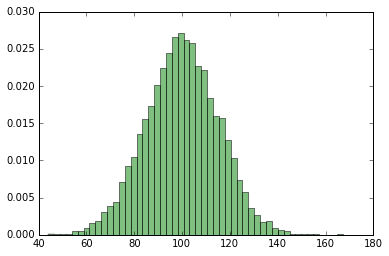

In [49]:
## Example 1: feeding RDD into matplotlib
# create random data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

# now distribute as RDD
rdd = sc.parallelize(x)
print rdd, rdd.take(5)

# show histogram: created by collect()ing RDD to local
num_bins = 50
n, bins, patches = plt.hist(rdd.collect(), num_bins, normed=1, facecolor='green', alpha=0.5)


DataFrame[pclass: string, survived: string, name: string, sex: string, age: string, sibsp: float, parch: string, ticket: string, fare: float, cabin: string, embarked: string, boat: string, body: string, home.dest: string]
+------+--------+--------------------+------+---+-----+-----+--------+-------+-------+--------+----+----+---------------+
|pclass|survived|                name|   sex|age|sibsp|parch|  ticket|   fare|  cabin|embarked|boat|body|      home.dest|
+------+--------+--------------------+------+---+-----+-----+--------+-------+-------+--------+----+----+---------------+
|     2|       0|"Campbell, Mr. Wi...|  male|   |  0.0|    0|  239853|    0.0|       |       S|    |    |        Belfast|
|     3|       1|"O'Leary, Miss. H...|female|   |  0.0|    0|  330919| 7.8292|       |       Q|  13|    |               |
|     3|       1|"Masselmani, Mrs....|female|   |  0.0|    0|    2649|  7.225|       |       C|   C|    |               |
|     1|       1|"Carter, Mrs. Wil...|female| 

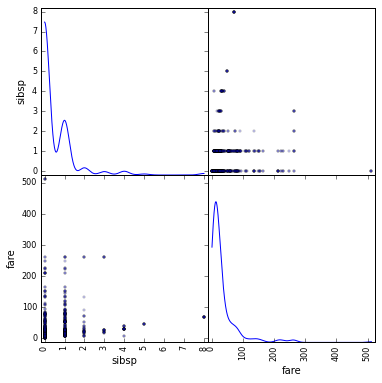

In [212]:
## Example 2: converting Spark DataFrame to Pandas for plotting
# read in tab delimited file
titanicRdd = sc.textFile('titanic.txt')    #.map(lambda x:x.split('\t'))
#print titanicRdd.take(5)

# take header
header = titanicRdd.first()

# build schema - set all to be strings then manually change a few
fields = [StructField(field_name, StringType(), True) for field_name in header.split('\t')]
fields[5].dataType = FloatType()
fields[8].dataType = FloatType()
schema = StructType(fields)

# 1. remove header from data - must parallelize or header is local only. Also, must be header into [] list
# 2. split delimiter and convert columns to correct datatypes
# 3. replace missings from float columns - note nifty use of 'or'
# 4. Convert unicode strings to correct data types
titanicRddNoHeader = titanicRdd.subtract(sc.parallelize([header]))\
                                .map(lambda x:x.split('\t'))\
                                .map(lambda row: (row[0], row[1], row[2], row[3], row[4], float(row[5] or 0), row[6], row[7],\
                                                  float(row[8] or 0), row[9], row[10], row[11], row[12], row[13]) )
# titanicRddNoHeader.take(5)

# convert to dataframe with schema. Split out tab-delimiter as we go
titanicdf = sqlContext.createDataFrame(titanicRddNoHeader, schema)
print titanicdf
print titanicdf.show(5)

# now, convert to local pandas dataframe, and use pandas plotting
titanicPandas = titanicdf.toPandas()

from pandas.tools.plotting import scatter_matrix
stuff, plot = scatter_matrix(titanicPandas, alpha=0.2, figsize=(6, 6), diagonal='kde')
